In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tifffile as tf
# label
stim = np.array([3,1,2,3,2,1,3,1,2,1,2,3,1,2,3,2,3,1,3,2,1,2,3,1,2,3,1,2,1,3,2,3,1,2,3,1,3,1,2,3,1,2,3,2,1,2,1,3,2,1,3,1,2,3,1,2,3,2,1,3,1,2,3,2,1,3,1,3,2,3,2,1,3,2,1,3,1,2,3,2,1,3,1,2,3,2,1,2,3,1,
                 3,1,2,3,1,2,3,2,1,2,3,1,2,1,3,2,1,3,1,3,2,3,1,2,1,2,3,2,3,1,2,3,1,3,2,1,2,3,1,2,1,3,1,2,3,2,3,1,2,1,3,1,3,2,3,1,2,1,2,3,2,1,3,1,2,3,2,3,1,3,1,2,1,3,2,1,3,2,3,1,2,3,2,1,2,1,3,1,2,3])


In [2]:
atlas_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new/nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly2/align_to_atlas/Transformed_atlas.tif'
atlas_z_range = range(13,38)
# load atlas
atlas= tf.imread(atlas_path)
atlas = np.transpose(atlas,[1,2,0])
atlas = atlas[:,:,atlas_z_range]
print('load atlas done! size:')
print(np.shape(atlas))
atlas_reshape = atlas.reshape(-1,order = 'F')
inds = np.argsort(atlas_reshape)
atlas_sorted = np.sort(atlas_reshape)

load atlas done! size:
(256, 256, 25)


In [3]:
# load data
data_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new/nsyb-G7f-r5HT1.0/20230513-nsyb-G7f-r5HT1.0/fly2/data'
data_c2 = np.load(data_path+'/'+'dff0_-3-20_down1_C2.npy')
data_c2 = np.transpose(data_c2,[3,4,2,0,1])
print(np.shape(data_c2))
data_new_c2 = data_c2.reshape((-1,np.size(data_c2,3),np.size(data_c2,4)),order = 'F')
del data_c2
data_c3 = np.load(data_path+'/'+'dff0_-6-40_down2_C3.npy')
data_c3 = np.transpose(data_c3,[3,4,2,0,1])
print(np.shape(data_c3))
data_new_c3 = data_c3.reshape((-1,np.size(data_c3,3),np.size(data_c3,4)),order = 'F')
del data_c3
data_new_c2 = data_new_c2[inds,:,:]
data_new_c3 = data_new_c3[inds,:,:]

(256, 256, 25, 180, 23)
(256, 256, 25, 180, 23)


In [4]:
if_save = True
figure_save_path = '../results/5HT-ver16/figures-for-ver16-final6'
br_index = [64,65,66,55,72,73,74,63,84,59,56,79,75,76,77,60,80,82,85,67,4,23,26]
br_index = np.array(br_index) 
br_name = ['MBPED_L','MBVL_L','MBML_L','LH_L','SLP_L','SIP_L','SMP_L','CRE_L','SCL_L','ICL_L',
'LAL_L','AOTU_L','AVLP_L','PVLP_L','IVLP_L','VES_L','GOR_L','SPS_L','EPA_L','FLA_L','NO','EB','FB']
br_index_2 = [17,18,19,7,27,28,29,16,39,12,8,34,30,31,32,13,35,37,40,20]
br_name_2 = ['MBPED_R','MBVL_R','MBML_R','LH_R','SLP_R','SIP_R','SMP_R','CRE_R','SCL_R','ICL_R',
'LAL_R','AOTU_R','AVLP_R','PVLP_R','IVLP_R','VES_R','GOR_R','SPS_R','EPA_R','FLA_R']
br_index = np.concatenate((br_index,br_index_2),axis = 0)
print(np.shape(br_index))

(43,)


In [5]:
# only select specific brain regions
data_new_c2_2 = []
data_new_c3_2 = []
atlas_sorted_2 = []
for i in br_index:
    if len(atlas_sorted_2)==0:
        data_new_c2_2.append(data_new_c2[atlas_sorted==i,:,:])
        data_new_c3_2.append(data_new_c3[atlas_sorted==i,:,:])
        atlas_sorted_2.append(atlas_sorted[atlas_sorted==i])
        data_new_c2_2 = np.array(data_new_c2_2)
        data_new_c3_2 = np.array(data_new_c3_2)
        atlas_sorted_2 = np.array(atlas_sorted_2)
        data_new_c2_2 = np.squeeze(data_new_c2_2)
        data_new_c3_2 = np.squeeze(data_new_c3_2)
        atlas_sorted_2 = np.squeeze(atlas_sorted_2)
    else:
        data_new_c2_2 = np.concatenate((data_new_c2_2,data_new_c2[atlas_sorted==i,:,:]),axis = 0)
        data_new_c3_2 = np.concatenate((data_new_c3_2,data_new_c3[atlas_sorted==i,:,:]),axis = 0)
        atlas_sorted_2 = np.concatenate((atlas_sorted_2,atlas_sorted[atlas_sorted==i]),axis = 0)

    print(np.shape(data_new_c2_2))
    print(np.shape(data_new_c3_2))
    print(np.shape(atlas_sorted_2))

(1706, 180, 23)
(1706, 180, 23)
(1706,)
(4586, 180, 23)
(4586, 180, 23)
(4586,)
(9785, 180, 23)
(9785, 180, 23)
(9785,)
(10083, 180, 23)
(10083, 180, 23)
(10083,)
(16848, 180, 23)
(16848, 180, 23)
(16848,)
(20460, 180, 23)
(20460, 180, 23)
(20460,)
(29157, 180, 23)
(29157, 180, 23)
(29157,)
(35758, 180, 23)
(35758, 180, 23)
(35758,)
(36791, 180, 23)
(36791, 180, 23)
(36791,)
(38383, 180, 23)
(38383, 180, 23)
(38383,)
(44464, 180, 23)
(44464, 180, 23)
(44464,)
(48099, 180, 23)
(48099, 180, 23)
(48099,)
(73795, 180, 23)
(73795, 180, 23)
(73795,)
(78441, 180, 23)
(78441, 180, 23)
(78441,)
(82306, 180, 23)
(82306, 180, 23)
(82306,)
(87690, 180, 23)
(87690, 180, 23)
(87690,)
(88021, 180, 23)
(88021, 180, 23)
(88021,)
(88602, 180, 23)
(88602, 180, 23)
(88602,)
(89530, 180, 23)
(89530, 180, 23)
(89530,)
(92079, 180, 23)
(92079, 180, 23)
(92079,)
(92986, 180, 23)
(92986, 180, 23)
(92986,)
(97018, 180, 23)
(97018, 180, 23)
(97018,)
(103422, 180, 23)
(103422, 180, 23)
(103422,)
(105160, 180, 23)

In [6]:
# sort by odor response
a = data_new_c2_2[:,stim==1,:]
the_mean = np.mean(a,2)
the_mean = np.mean(the_mean,1)
inds_new = np.array(range(len(the_mean)))
atlas_id_list = br_index
for i in atlas_id_list:
    data_flag = the_mean[atlas_sorted_2==i]
    if len(data_flag)==0:
        continue
    ind_flag = np.argsort(data_flag)
    ind_flag = ind_flag[::-1]
    ind_origin = inds_new[atlas_sorted_2==i].copy()
    inds_new[atlas_sorted_2==i] = ind_origin[ind_flag]

In [7]:
# the first voxel of each region
print(np.shape(atlas_sorted_2))
aaa = np.concatenate(([1],atlas_sorted_2),axis = 0)
bbb = np.concatenate((atlas_sorted_2,[1]),axis = 0)
ind_flag = bbb-aaa
ind_flag = np.where(ind_flag!=0)
ind_flag = np.squeeze(ind_flag)
ind_flag = ind_flag[:-1]
print(np.shape(ind_flag))
print(np.shape(atlas_sorted_2[ind_flag]))

(202642,)
(43,)
(43,)


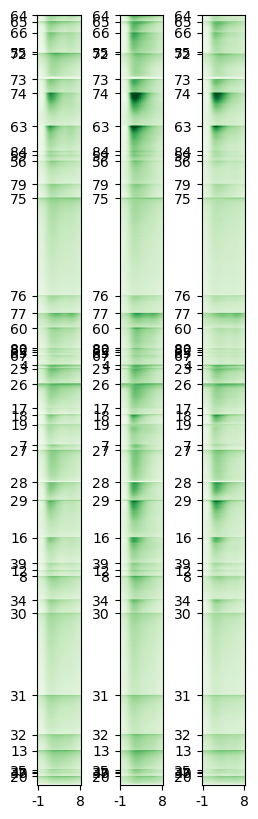

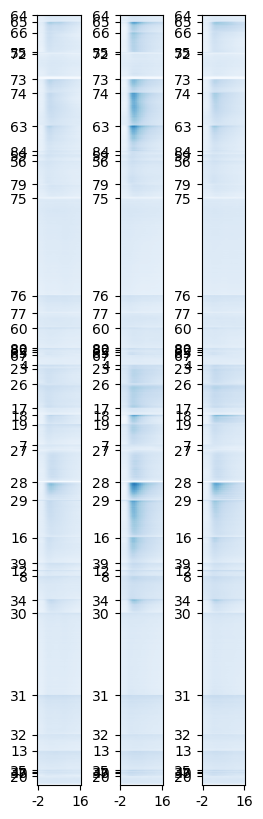

In [8]:
# imshow
plt.figure(figsize = (3,10))
for i in range(1,4):
    # sort by odor response
    a = data_new_c2_2[:,stim==i,:]
    a = np.mean(a,1)
    a = a[inds_new,:]
    plt.subplot(1,3,i)
    plt.imshow(a,cmap = 'Greens',aspect = '0.002',vmin = 0,vmax = 0.2)
    plt.xticks([0,22],['-1','8'])
    plt.yticks(ind_flag,atlas_sorted_2[ind_flag])
    # plt.colorbar()
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + 'fig1_hot_c2.pdf',dpi = 300,bbox_inches = 'tight')
plt.show()

# imshow
plt.figure(figsize = (3,10))
for i in range(1,4):
    # sort by odor response
    a = data_new_c3_2[:,stim==i,:]
    a = np.mean(a,1)
    a = a[inds_new,:]
    plt.subplot(1,3,i)
    plt.imshow(a,cmap = 'Blues', aspect = '0.002',vmin = 0,vmax = 0.2)
    plt.xticks([0,22],['-2','16'])
    plt.yticks(ind_flag,atlas_sorted_2[ind_flag])
    # plt.colorbar()
if if_save:
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    plt.savefig(figure_save_path + '/' + 'fig1_hot_c3.pdf',dpi = 300,bbox_inches = 'tight')
plt.show()

